In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [33]:
df = pd.read_csv('joy.csv')
df

,Timeperiod,output_voltage,output_current,switch1_voltage,switch1_current,switch2_voltage,switch2_current,switch3_voltage,switch3_current,switch4_voltage,switch4_current,switch5_voltage,switch5_current,switch6_voltage,switch6_current,switch7_voltage,switch7_current,switch8_voltage,switch8_current,Activity
0,0.000000e+00,0.000000,0.000000,50.000000,0.000000,50.000000,0.000000,50.000000,0.000000,50.000000,0.000000,50.000000,0.000000,50.000000,0.000000,50.000000,0.000000,50.000000,0.0,1
1,3.160000e-30,0.000000,0.000000,0.000100,0.001000,0.000100,0.001000,99.999900,0.000000,99.999900,0.000000,0.000100,0.001000,0.000100,0.001000,99.999900,0.000000,99.999900,0.0,1
2,2.500000e-03,0.000000,0.000000,0.000100,0.001000,0.000100,0.001000,99.999900,0.000000,99.999900,0.000000,0.000100,0.001000,0.000100,0.001000,99.999900,0.000000,99.999900,0.0,1
3,2.500000e-03,99.691572,0.996916,0.099791,0.997914,99.900209,0.000000,99.900209,0.000000,0.099791,0.997914,0.099791,0.997914,-0.009054,-0.995916,99.900209,0.000000,100.009054,0.0,1
4,5.000000e-03,99.691572,0.996916,0.099791,0.997914,99.900209,0.000000,99.900209,0.000000,0.099791,0.997914,0.099791,0.997914,-0.009054,-0.995916,99.900209,0.000000,100.009054,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8395,9.950000e-01,-99.691572,-0.996916,99.900209,0.000000,0.099791,0.997914,0.099791,0.997914,99.900209,0.000000,-0.009054,-0.995916,0.099791,0.997914,100.009054,0.000000,99.900209,0.0,0
8396,9.950000e-01,-199.202790,-1.992028,99.800698,0.000000,0.199302,1.993024,0.199302,1.993024,99.800698,0.000000,99.800698,0.000000,0.199302,1.993024,0.199302,1.993024,99.800698,0.0,0
8397,9.975000e-01,-199.202790,-1.992028,99.800698,0.000000,0.199302,1.993024,0.199302,1.993024,99.800698,0.000000,99.800698,0.000000,0.199302,1.993024,0.199302,1.993024,99.800698,0.0,0
8398,9.975000e-01,-99.691572,-0.996916,99.900209,0.000000,0.099791,0.997914,0.099791,0.997914,99.900209,0.000000,-0.009054,-0.995916,0.099791,0.997914,100.009054,0.000000,99.900209,0.0,0


In [35]:
! pip install -U imbalanced-learn

In [37]:
X = df.drop(['Activity'], axis=1)
y = df['Activity']

In [42]:
activity_count = y.value_counts()
activity_count

0    7560
1     840
Name: Activity, dtype: int64

<AxesSubplot:ylabel='Activity'>

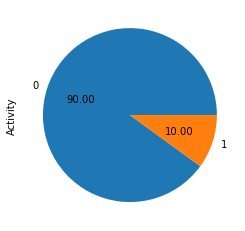

In [43]:
y.value_counts().plot.pie(autopct='%.2f')


In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [45]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6720, 19), (6720,), (1680, 19), (1680,))

<AxesSubplot:ylabel='Activity'>

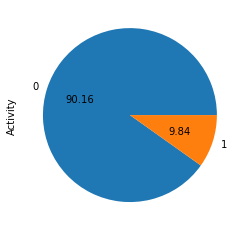

In [46]:
# Pie chart of the training set
y_train.value_counts().plot.pie(autopct='%.2f')

In [47]:
y_train.value_counts()

0    6059
1     661
Name: Activity, dtype: int64

In [48]:
pip install ruamel.yaml

Note: you may need to restart the kernel to use updated packages.


In [49]:
from imblearn.under_sampling import RandomUnderSampler

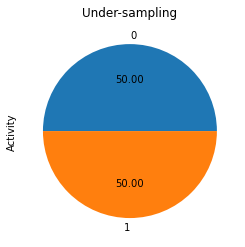

In [50]:
rus = RandomUnderSampler(sampling_strategy=1) # Numerical value
# rus = RandomUnderSampler(sampling_strategy="not minority") # String
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

ax = y_train_rus.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [51]:
# Class distribution
y_train_rus.value_counts()

0    661
1    661
Name: Activity, dtype: int64

In [52]:
# Training Random Forest Models
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train_rus, y_train_rus)

# Training Cross-validation Models
from sklearn.metrics import make_scorer, recall_score, matthews_corrcoef
from sklearn.model_selection import cross_validate

model_cv = RandomForestClassifier(random_state=42)
cv_scoring = {'MCC': make_scorer(matthews_corrcoef)}
cv = cross_validate(model_cv, X_train_rus, y_train_rus, cv=5, scoring=cv_scoring)

# Apply model to make prediction
from sklearn.metrics import matthews_corrcoef

y_train_pred = model.predict(X_train_rus)
y_test_pred = model.predict(X_test)
  
mcc_train = matthews_corrcoef(y_train_rus, y_train_pred)
mcc_test = matthews_corrcoef(y_test, y_test_pred)
mcc_cv = cv['test_MCC'].mean()

# Display model performance results
df_labels = pd.Series(['MCC_train', 'MCC_CV', 'MCC_test'], name = 'Performance_metric_names')
df_values = pd.Series([mcc_train, mcc_cv, mcc_test], name = 'Performance_metric_values')
df2 = pd.concat([df_labels, df_values], axis=1)
df2

,Performance_metric_names,Performance_metric_values
0,MCC_train,0.643204
1,MCC_CV,0.121595
2,MCC_test,0.096009


In [53]:
predictions = model.predict([ [ 0.0125    ,   -99.692         ,  -0.99692            ,  99.9           ,       0       ,    0.099791      ,      0.99791      ,     0.099791       ,     0.99791       ,        99.9         ,         0      ,    -0.0090538    ,      -0.99592        ,    0.099791  ,         0.99791    ,        100.01        ,          0        ,       99.9               , 0       ], [         0.055       , -199.2            , -1.992       ,     99.801       ,           0           ,  0.1993            ,  1.993         ,    0.1993         ,     1.993      ,       99.801       ,           0           ,   99.801         ,        0          ,    0.1993       ,      1.993         ,   0.1993      ,        1.993         ,    99.801             ,   0] ])
predictions

C:\Users\SANJAY\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1, 1], dtype=int64)

In [54]:
predictions = model.predict([ [       0.9825         ,    0              ,    0          ,  0.0001        ,      0.001        ,     0.0001         ,     0.001          ,      100         ,         0               , 100           ,       0          ,    0.0001        ,     0.001            ,  0.0001           ,  0.001        ,       100      ,            0       ,         100              ,    0     ], [    1      , -99.691          , -0.99691            ,  99.9            ,      0          ,  0.09979         ,    0.9979           , 0.09979           ,  0.9979             ,  99.9           ,       0         , -0.0099591        ,  -0.99591         ,    0.09979       ,     0.9979         ,   100.01        ,        0          ,       99.9             ,     0         ] ])
predictions

C:\Users\SANJAY\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0, 0], dtype=int64)